#### Tricia Jonina B. Alcisto

#### Assignment 1

dataset: https://www.kaggle.com/datasets/hemil26/mass-shootings-in-united-states-20182022/data
Limitations: only used 2018 to 2020 csv

         Date      State  Dead  Injured  Total  \
0  31/12/2018       Ohio     3        2      5   
1  29/12/2018       Ohio     1        3      4   
2  28/12/2018   Missouri     4        1      5   
3  24/12/2018  Louisiana     2        2      4   
4  23/12/2018   Missouri     0        7      7   

                                         Description  
0  A dispute began at a rented Airbnb during a Ne...  
1  One person was killed and three people were wo...  
2  A gunman shot and killed his girlfriend, her t...  
3  Three people were killed and two others were w...  
4  Seven people were wounded during a shooting at...  


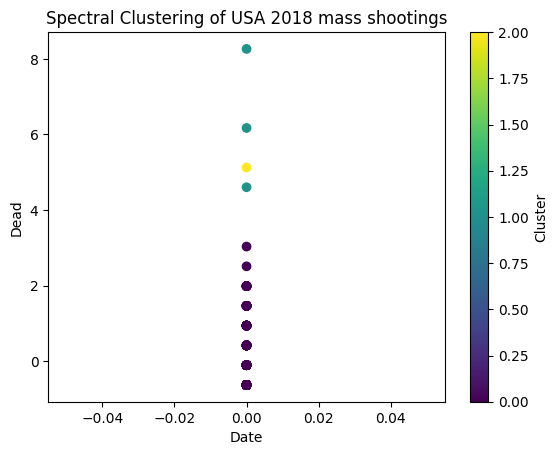

In [52]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df=pd.read_csv(r'.\shootings_2018.csv')
print(df.head())

selected_features = df[['Date','Dead','Injured']]
selected_features = selected_features.apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
selected_features_standardized = scaler.fit_transform(selected_features)

n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['cluster'] = spectral.fit_predict(selected_features_standardized)

plt.scatter(selected_features_standardized[:, 0], selected_features_standardized[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Spectral Clustering of USA 2018 mass shootings')
plt.xlabel('Date')
plt.ylabel('Dead')
plt.colorbar(label='Cluster')
plt.show()


         Date       State  Dead  Injured  Total  \
0  29/12/2019       Texas     3        0      3   
1  29/12/2019  California     0        5      5   
2  29/12/2019    Illinois     0        5      5   
3  29/12/2019    New York     1        3      4   
4  27/12/2019       Texas     2        7      9   

                                         Description  
0  West Freeway Church of Christ shooting: Two pe...  
1  Five people were shot outside a home after ret...  
2  Five women aged 18 to 32 years old were injure...  
3  After an argument escalated on a front porch, ...  
4  Two people were killed and seven injured in a ...  


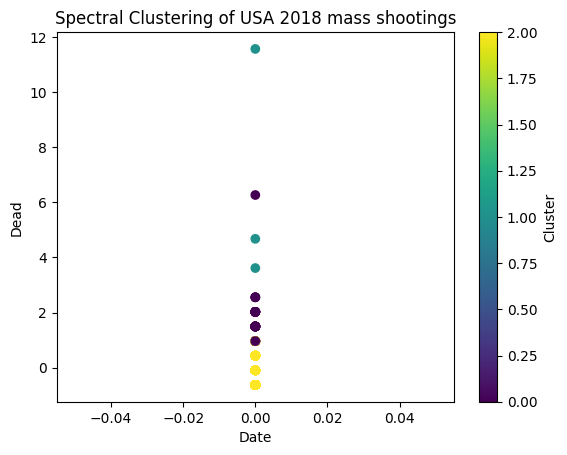

In [53]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df=pd.read_csv(r'.\shootings_2019.csv')
print(df.head())

selected_features = df[['Date','Dead','Injured']]
selected_features = selected_features.apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
selected_features_standardized = scaler.fit_transform(selected_features)

n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['cluster'] = spectral.fit_predict(selected_features_standardized)

plt.scatter(selected_features_standardized[:, 0], selected_features_standardized[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Spectral Clustering of USA 2018 mass shootings')
plt.xlabel('Date')
plt.ylabel('Dead')
plt.colorbar(label='Cluster')
plt.show()


         Date                         State  Dead  Injured  Total  \
0  31/12/2020                       Indiana     1        3      4   
1  31/12/2020                        Oregon     0        4      4   
2  27/12/2020  United States Virgin Islands     0        4      4   
3  26/12/2020                 Massachusetts     1        5      6   
4  26/12/2020                      Illinois     3        3      6   

                                         Description  
0  A shooting unfolded outside a nightclub on New...  
1  Four people were wounded after a shooting at a...  
2  Four men were wounded after a shooting near a ...  
3  Six people were wounded in an evening shooting...  
4  Don Carter Lanes shooting: Three people are ki...  


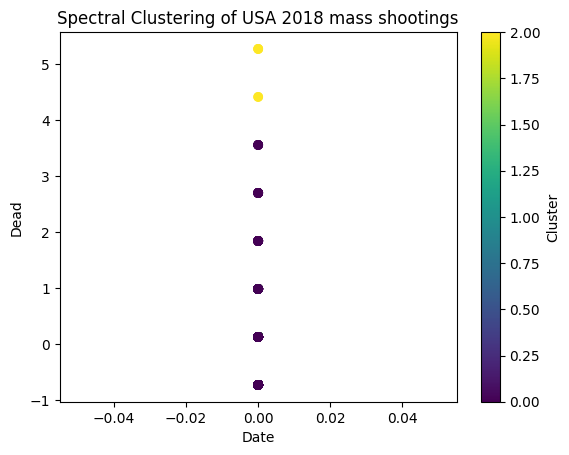

In [54]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df=pd.read_csv(r'.\shootings_2020.csv')
print(df.head())

selected_features = df[['Date','Dead','Injured']]
selected_features = selected_features.apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
selected_features_standardized = scaler.fit_transform(selected_features)

n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['cluster'] = spectral.fit_predict(selected_features_standardized)

plt.scatter(selected_features_standardized[:, 0], selected_features_standardized[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Spectral Clustering of USA 2018 mass shootings')
plt.xlabel('Date')
plt.ylabel('Dead')
plt.colorbar(label='Cluster')
plt.show()


#### Eigenvector Centrality

Node a: 0.51807347662071
Node b: 0.21182192277183212
Node c: 0.5986761070959697
Node d: 0.4566010978754134
Node e: 0.24477918831750853
Node f: 0.24477918831750853


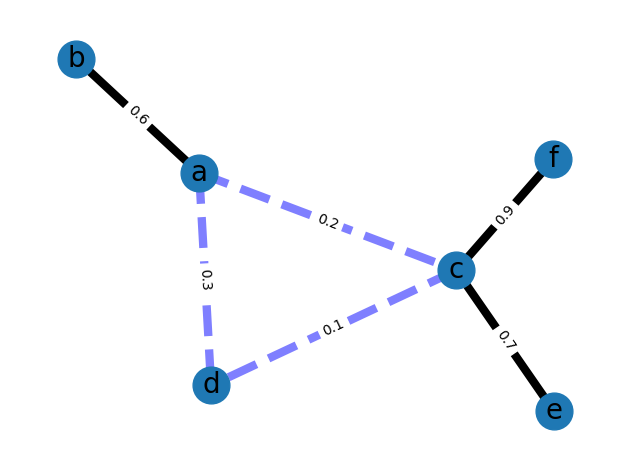

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

eigenvector_centrality = nx.eigenvector_centrality(G)
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

MachinaBlau: 0.6594478140467199, Community: 0
J3llo: 0.08597629838161631, Community: 1
AcademicRisk4078: 0.07784670308629275, Community: 1
model-alice: 0.0768987003918437, Community: 2
MCYomi: 0.0768987003918437, Community: 2
EmptyEmployment: 0.06886810516907638, Community: 0
765ProIdols: 0.09642582357748836, Community: 3
osadist: 0.09642582357748836, Community: 3
Peacetoall01: 0.1674571670903038, Community: 3
delusionalzodiacguy: 0.16079788732127676, Community: 4
SteSalva96: 0.08566050593405096, Community: 4
TruckSignificant: 0.14452123330411945, Community: 5
federicodc05: 0.1566798453671101, Community: 5
Cheruvial: 0.14162296737560773, Community: 6
fallinwinterzero: 0.11610444554688867, Community: 6
BuyTraditional2750: 0.1432379692063068, Community: 6
Disastrous-Peace-449: 0.12825231116076757, Community: 7
Nextorder95: 0.13813603414658834, Community: 5
SuccessfulShallot862: 0.09965618170697342, Community: 5
Lurker_Number140: 0.12429295316537707, Community: 5
KhajaArius: 0.06886810516

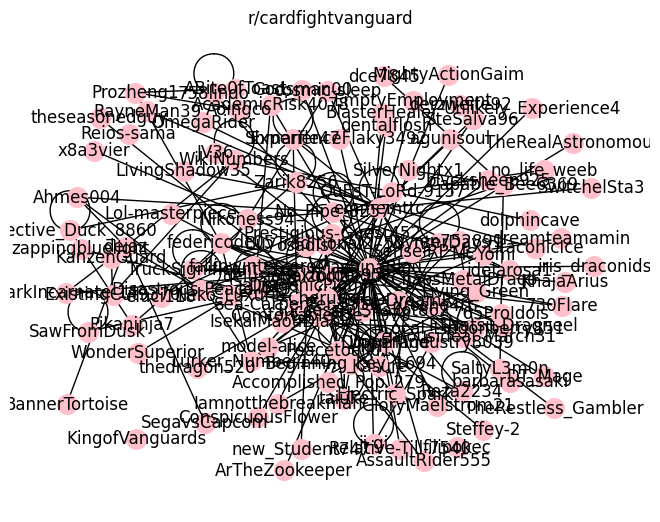

In [24]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id="KpQrYmuYRCZrvSs4me_mXQ", client_secret="7OiTUu7Il84lMwATeVPYDYxb_zZT2Q", user_agent="PsychologicalBook745")
subreddit=reddit.subreddit('cardfightvanguard')
commentCount=78
g=nx.Graph()

def recursive_node_adder(g, comment, parent_author):
    
    if comment.author is not None:
        if comment.author not in g.nodes:
            g.add_node(comment.author)
        g.add_edge(comment.author, parent_author)
        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue
            recursive_node_adder(g, reply, comment.author)

for post in subreddit.hot(limit=20):
    if post.author not in g.nodes:
        g.add_node(post.author)
    post.comment_limit = commentCount
    for comment in post.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        recursive_node_adder(g, comment, post.author)

g_undirected = g.to_undirected()

communities = nx.community.label_propagation.label_propagation_communities(g_undirected)
community_dict = {user: i for i, community in enumerate(communities) for user in community}
nx.set_node_attributes(g, community_dict, 'community')

eigenvector_centrality = nx.eigenvector_centrality(g)

for user, centrality in eigenvector_centrality.items():
    print(f"{user}: {centrality}, Community: {g.nodes[user]['community']}")



eigenvector_centrality = nx.eigenvector_centrality(g)
central_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
print("central nodes:", central_nodes[:5])

pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)
nx.draw(g, pos, node_color='pink', width=1, with_labels=True, node_size=200)
plt.title('r/cardfightvanguard')
plt.show()

According to the data and graph, we can hypothesize that users in r/cardfightvanguard as seen in the hot section of the subreddit have user interactions in the comments section. There is an intriguing correlation as users express heightened interest in the subreddit, with a potential positive relationship between their level of enthusiasm and the quantity of comments they leave under posts.This connection becomes more clear when examining the parent-to-child comment relationships, indicating that active participants not only share their perspectives but also engage in discussions that foster a sense of community and shared interest within the subreddit.